**Concrete_Strength_Prediction**


Data Description
The dataset consists of 1030 instances with 9 attributes. There are 8 input variables and 1 output variable. Seven input variables represent the amount of raw material (measured in kg/m³) and one represents Age (in Days). The target variable is Concrete Compressive Strength measured in (MPa — Mega Pascal). We shall explore the data to see how input features are affecting compressive strength.The concrete compressive strength is the regression problem.


Name -- Data Type -- Measurement -- Description

There are 8 independent variable and one dependent variable

Cement   -- kg in a m3 mixture -- Input Variable

Blast Furnace Slag  -- kg in a m3 mixture -- Input Variable

Fly Ash  -- kg in a m3 mixture -- Input Variable

Water -- kg in a m3 mixture -- Input Variable

Superplasticizer   -- kg in a m3 mixture -- Input Variable

Coarse Aggregate  -- kg in a m3 mixture -- Input Variable

Fine Aggregate  -- kg in a m3 mixture -- Input Variable

Age  -- Day (1~365) -- Input Variable

Concrete compressive strength  -- MPa -- Output Variable

In [2]:
#Importing important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore' )
%matplotlib inline

In [3]:
#DATA_INGESTION_STEP
Concrete_Data=pd.read_csv("concrete_data.csv")

In [4]:
Concrete_Data.head()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [5]:
Concrete_Data.tail()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77
1029,260.9,100.5,78.3,200.6,8.6,864.5,761.5,28,32.40


In [7]:
# Checking the missing values
Concrete_Data.isnull().sum()

cement                           0
blast_furnace_slag               0
fly_ash                          0
water                            0
superplasticizer                 0
coarse_aggregate                 0
fine_aggregate                   0
age                              0
concrete_compressive_strength    0
dtype: int64

NO MISSING VALUES ARE THERE IN THE DATASET

In [8]:
# Checking the datatype of the variables.
Concrete_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   cement                         1030 non-null   float64
 1   blast_furnace_slag             1030 non-null   float64
 2   fly_ash                        1030 non-null   float64
 3   water                          1030 non-null   float64
 4   superplasticizer               1030 non-null   float64
 5   coarse_aggregate               1030 non-null   float64
 6   fine_aggregate                 1030 non-null   float64
 7   age                            1030 non-null   int64  
 8   concrete_compressive_strength  1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [10]:
# Checking the shape of dataset.
Concrete_Data.shape

(1030, 9)

In [14]:
#To check the duplicated records.
Concrete_Data.duplicated().sum()

25

In [15]:
# Now drop the duplicate records.
Concrete_Data = Concrete_Data.drop_duplicates()

In [16]:
Concrete_Data.duplicated().sum()

0

In [18]:
Concrete_Data.describe()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
count,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000
mean,278.631343,72.043483,55.536318,182.075323,6.033234,974.376816,772.688259,45.856716,35.250378
std,104.344261,86.170807,64.207969,21.339334,5.919967,77.579667,80.340435,63.734692,16.284815
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,190.700000,0.000000,0.000000,166.600000,0.000000,932.000000,724.300000,7.000000,23.520000
50%,265.000000,20.000000,0.000000,185.700000,6.100000,968.000000,780.000000,28.000000,33.800000
75%,349.000000,142.500000,118.300000,192.900000,10.000000,1031.000000,822.200000,56.000000,44.870000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [30]:
# Taking sample of the dataset.
Concrete_Data_sample = Concrete_Data.sample(frac = 0.30)

In [33]:
# Checking the shape of the dataset
Concrete_Data_sample.shape

(302, 9)

In [36]:
Columns = Concrete_Data_sample.columns

In [37]:
Columns

Index(['cement', 'blast_furnace_slag', 'fly_ash', 'water', 'superplasticizer',
       'coarse_aggregate', 'fine_aggregate ', 'age',
       'concrete_compressive_strength'],
      dtype='object')

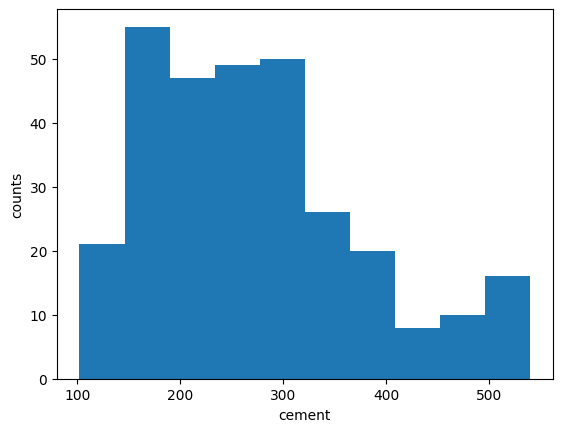

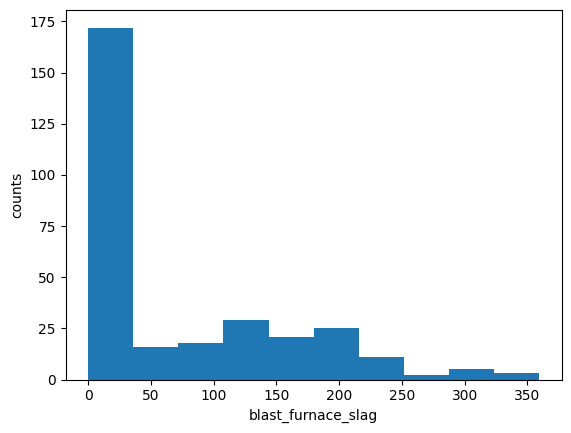

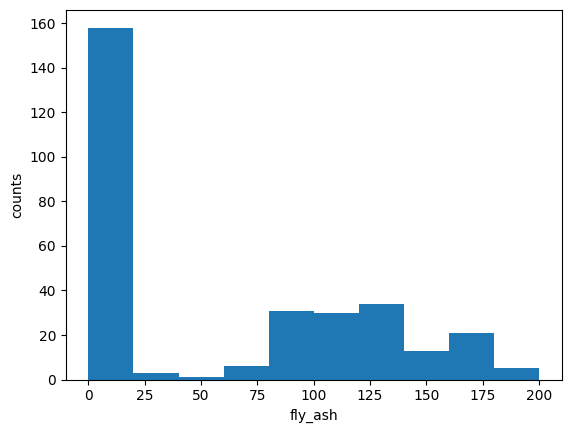

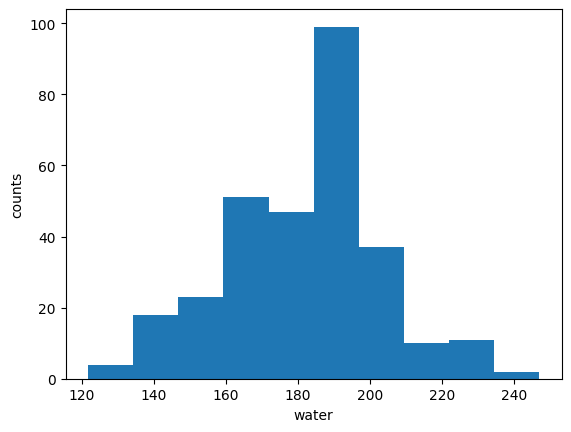

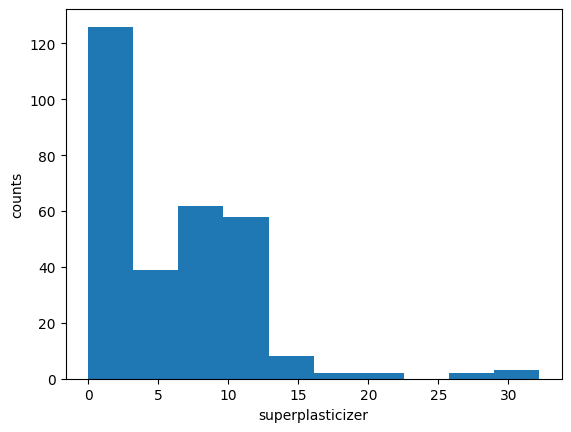

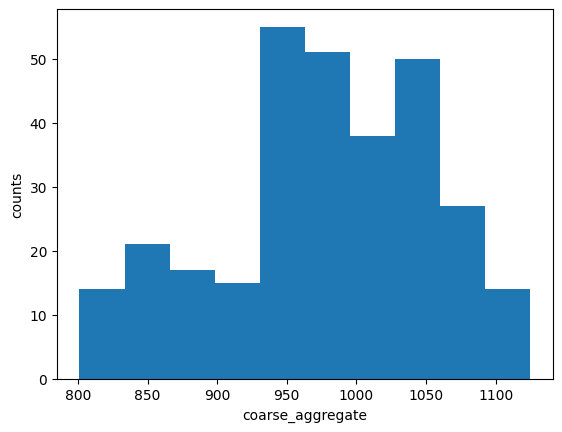

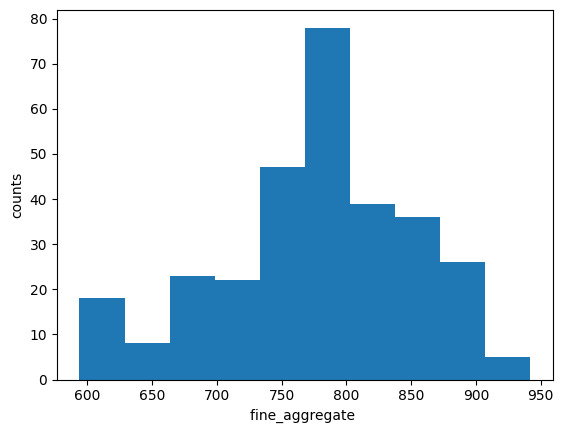

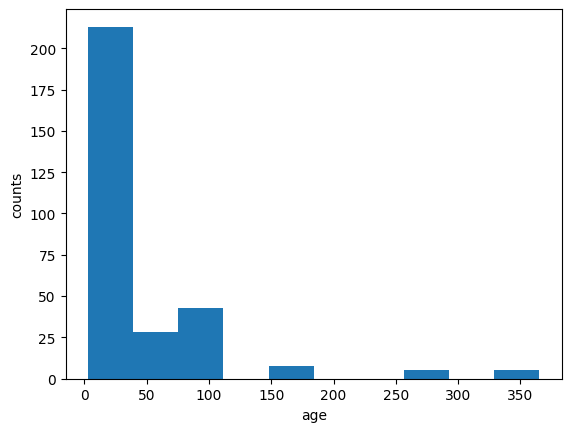

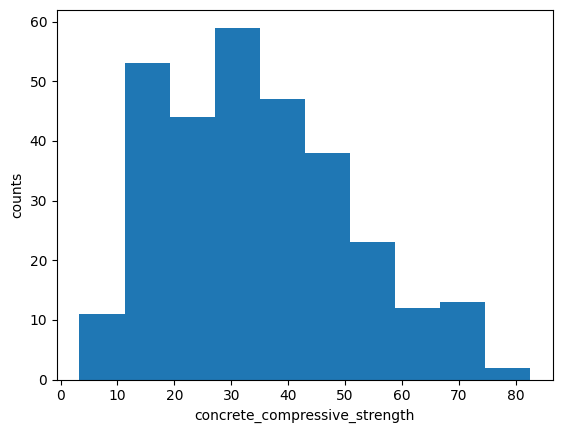

In [63]:
# By plotting histogram we can check how the data is distributed.
# We are iterating over the columns.
for i in Columns:
    plt.hist(Concrete_Data_sample[i])
    plt.xlabel(i)
    plt.ylabel('counts')
    plt.show()

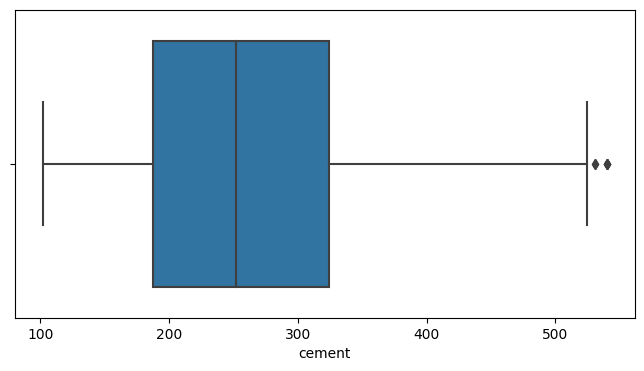

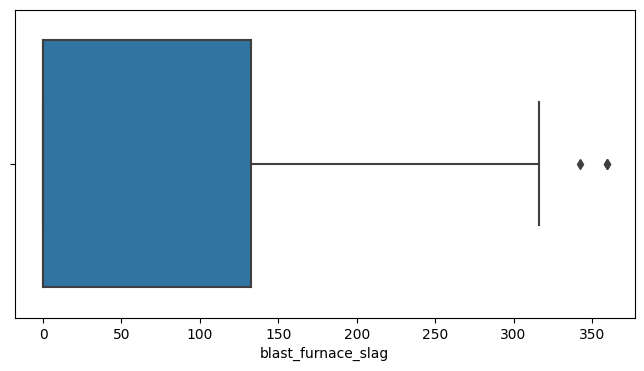

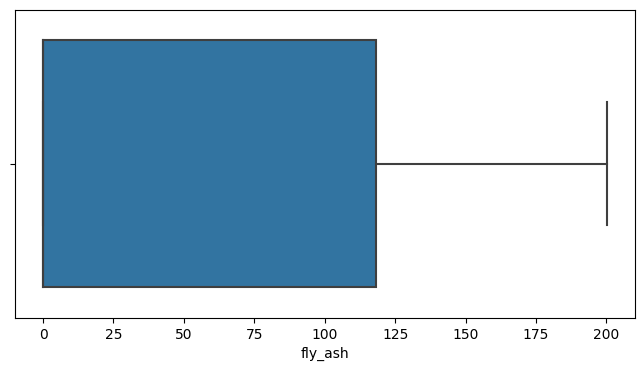

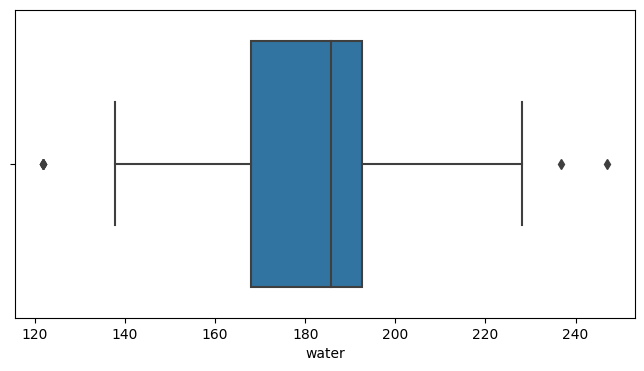

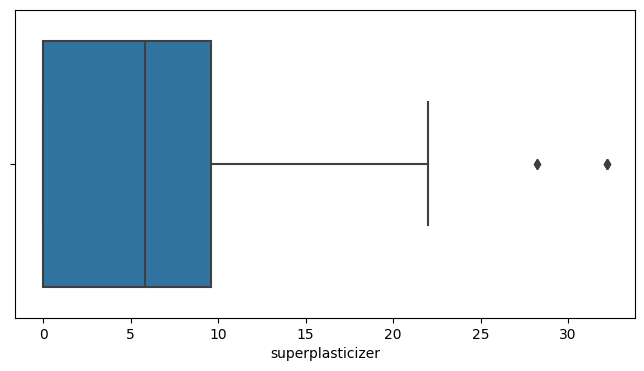

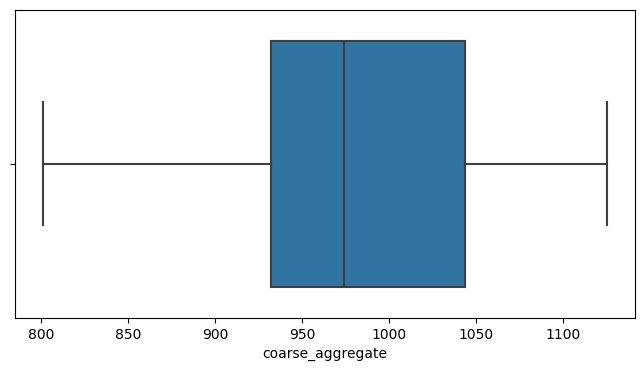

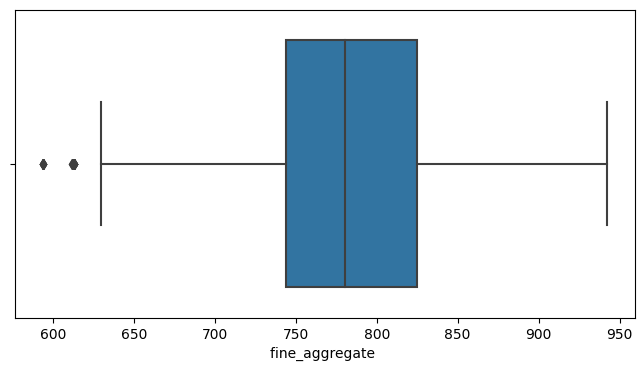

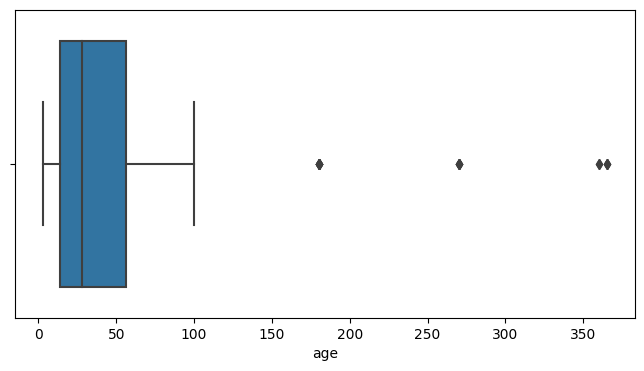

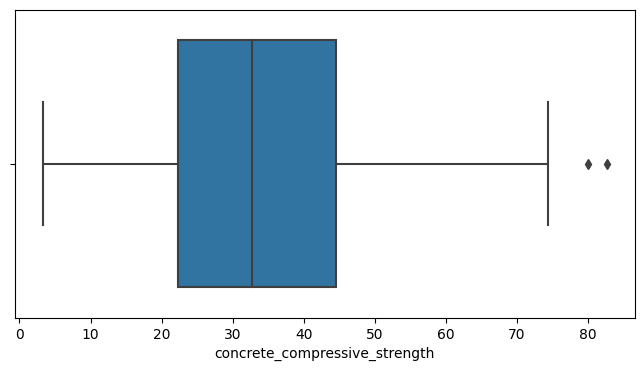

In [48]:
#We are just checking the outliers in each column.
for i in Columns:
    plt.figure(figsize=(8,4))
    sns.boxplot(x=i,data=Concrete_Data_sample);

**Some columns shows outliers.Age column appears to have the maximum outliers.**

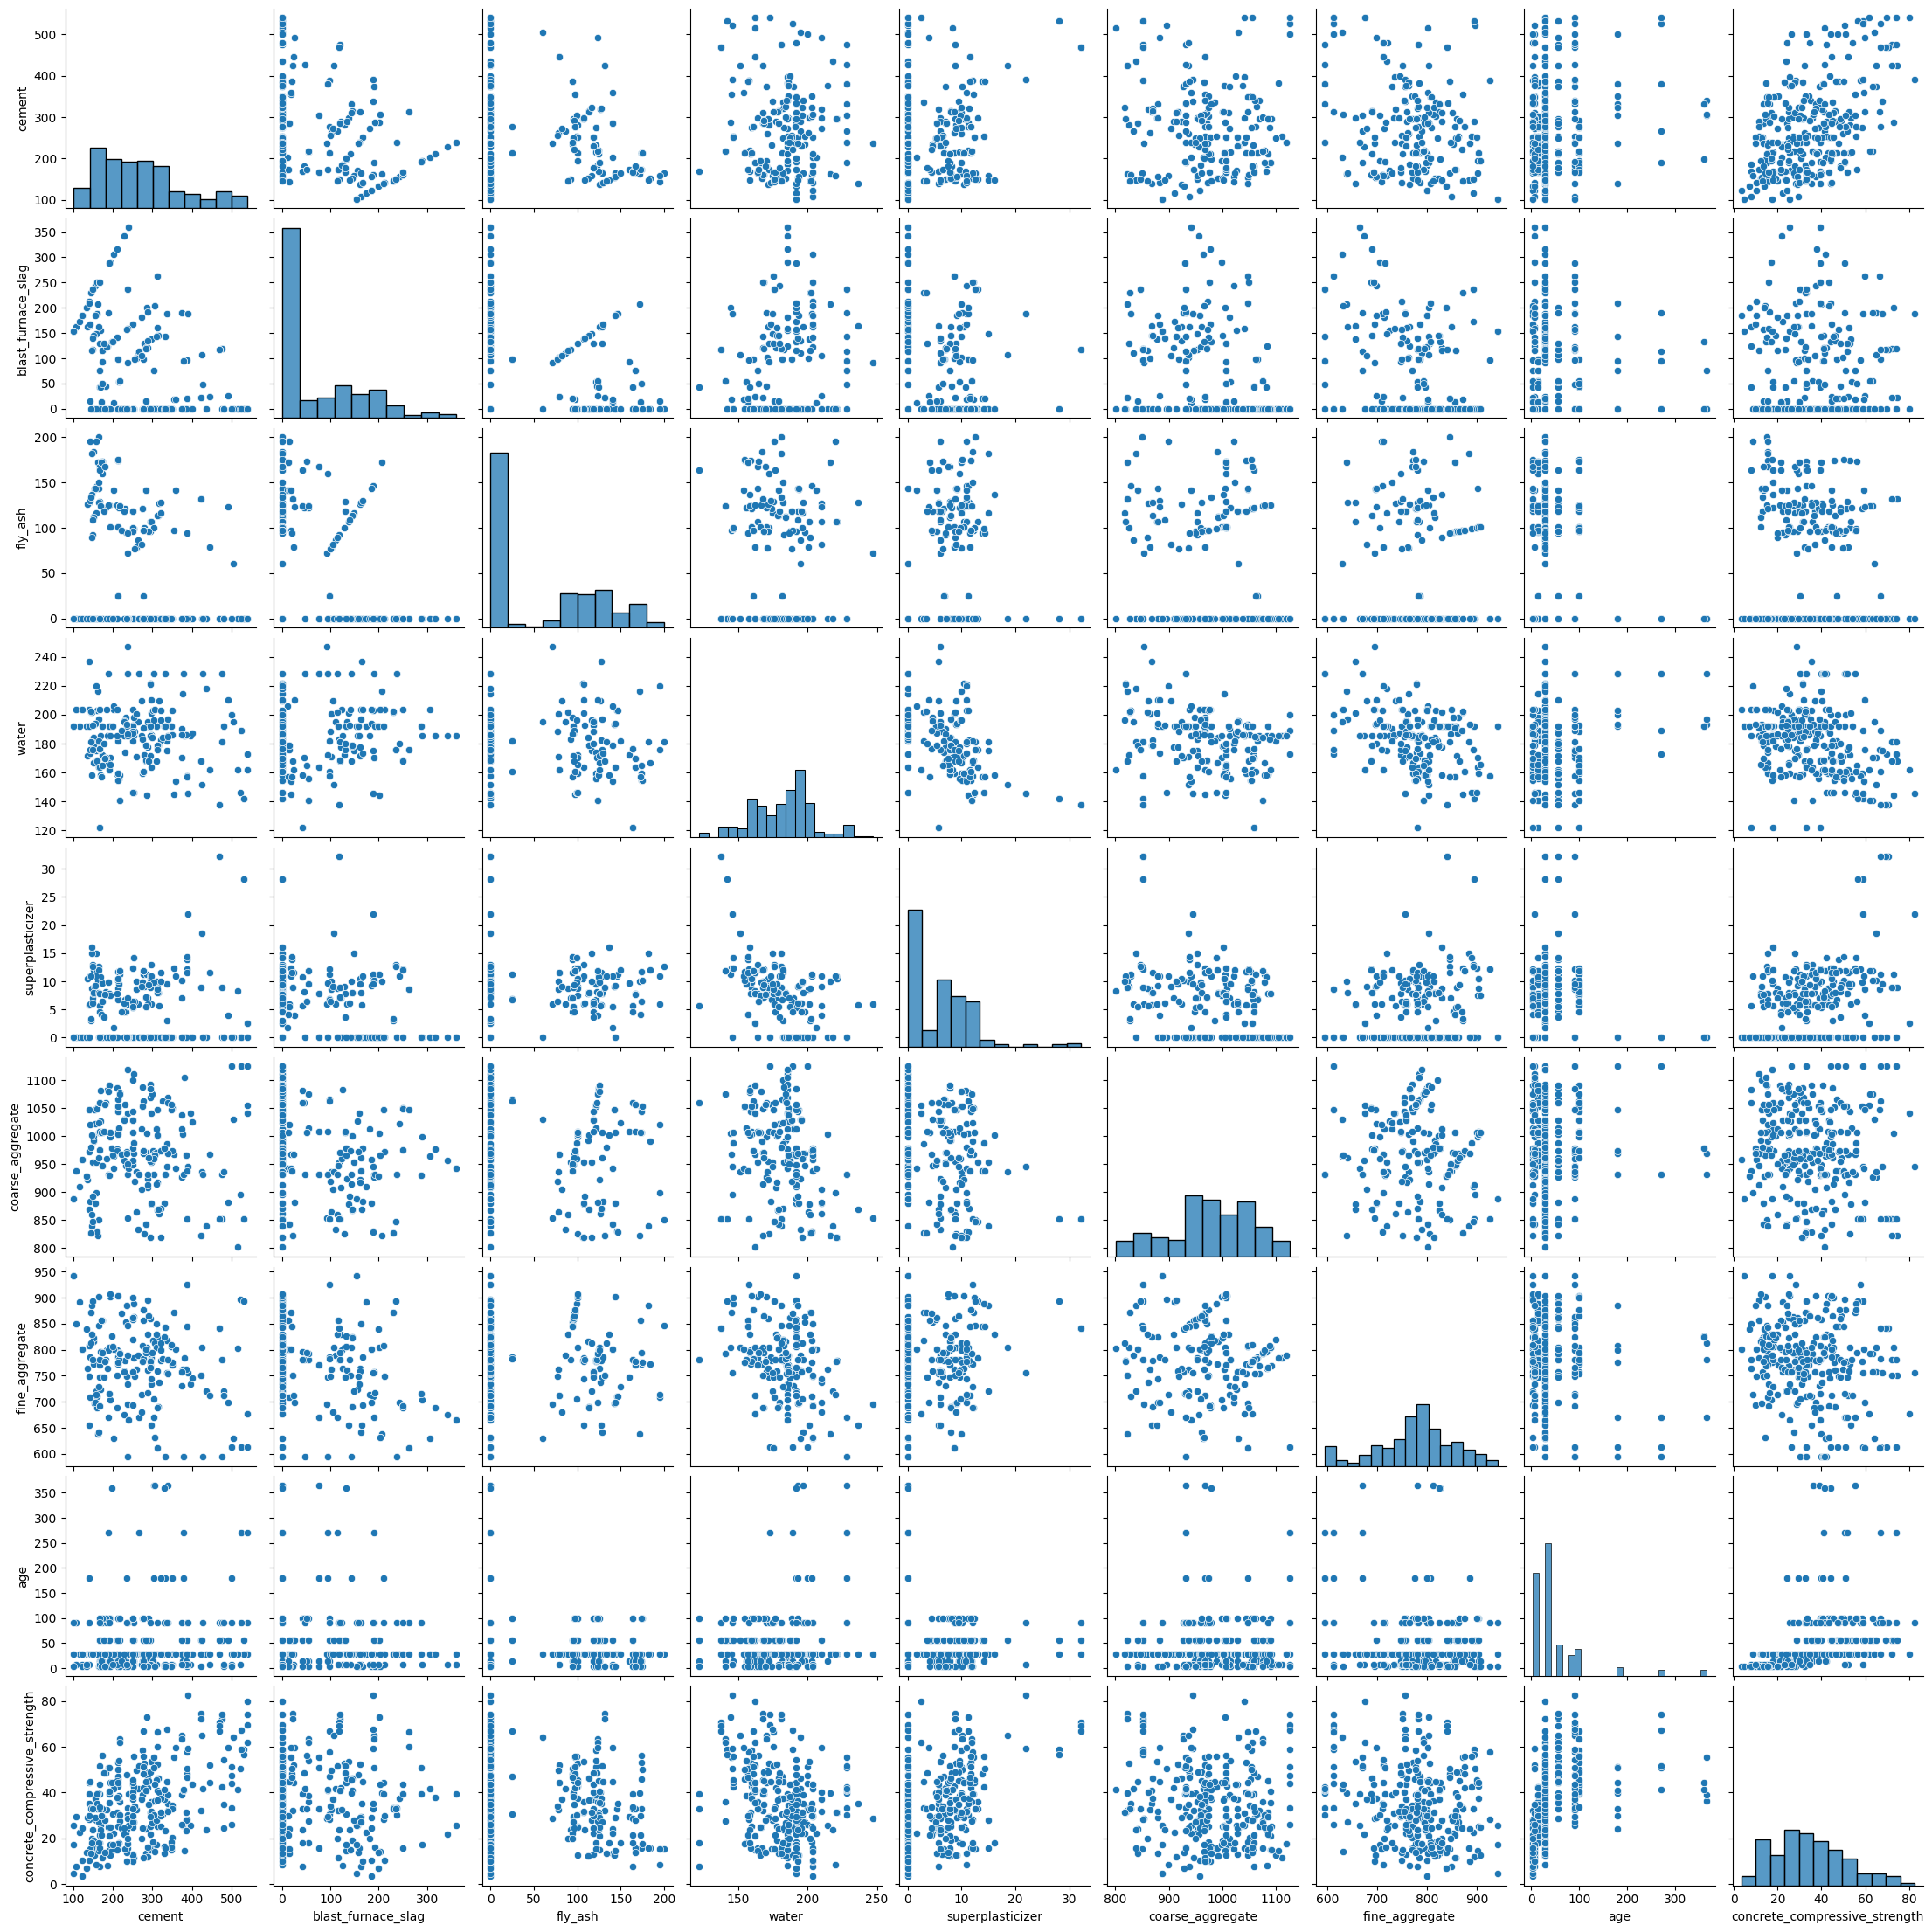

In [31]:
# Pairplot of the sampled-dataset
sns.pairplot(Concrete_Data_sample)

In [64]:
# Checking the correlation between the features.
corr = Concrete_Data.corr()

In [66]:
corr

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
cement,1.000000,-0.303324,-0.385610,-0.056625,0.060906,-0.086205,-0.245375,0.086348,0.488283
blast_furnace_slag,-0.303324,1.000000,-0.312352,0.130262,0.019800,-0.277559,-0.289685,-0.042759,0.103374
fly_ash,-0.385610,-0.312352,1.000000,-0.283314,0.414213,-0.026468,0.090262,-0.158940,-0.080648
water,-0.056625,0.130262,-0.283314,1.000000,-0.646946,-0.212480,-0.444915,0.279284,-0.269624
superplasticizer,0.060906,0.019800,0.414213,-0.646946,1.000000,-0.241721,0.207993,-0.194076,0.344209
coarse_aggregate,-0.086205,-0.277559,-0.026468,-0.212480,-0.241721,1.000000,-0.162187,-0.005264,-0.144717
fine_aggregate,-0.245375,-0.289685,0.090262,-0.444915,0.207993,-0.162187,1.000000,-0.156572,-0.186448
age,0.086348,-0.042759,-0.158940,0.279284,-0.194076,-0.005264,-0.156572,1.000000,0.337367
concrete_compressive_strength,0.488283,0.103374,-0.080648,-0.269624,0.344209,-0.144717,-0.186448,0.337367,1.000000


<Axes: >

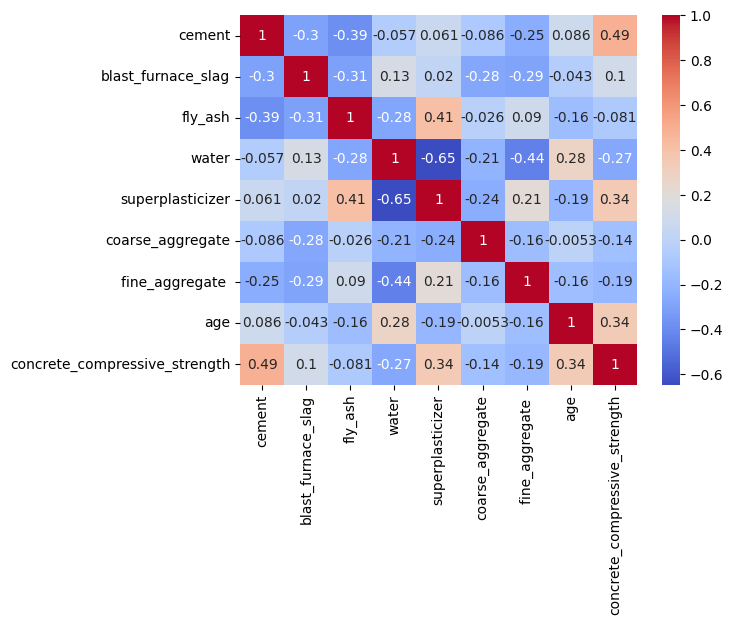

In [67]:
# Creating the heatmap to check the correlation belween the features. 
sns.heatmap(corr,annot=True,cbar=True, cmap='coolwarm')

**We can observe a high positive correlation between compressive Strength (CC_Strength) and Cement.**
**Also, Age and Super Plasticizer are the other two factors influencing Compressive strength.**